## Crime Report Analysis (2021)

### 1. Introduction

This notebook analyzes the 2021 Crime Report from the National Police Service (NPS) to identify trends, patterns, and insights related to crime incidents. The data will be loaded, cleaned, explored, and visualized to provide a comprehensive overview of the crime landscape in Kenya for the year 2021.

### 2. Data Loading and Initial Inspection

First, we'll load the dataset and perform an initial inspection to understand its structure, data types, and identify any immediate issues.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new dataset
df = pd.read_csv('Crime Report - 2020.csv')

In [2]:
df.head()

,County,Population (2019),Crime Cases (2020),"Crime Index (per 100,000)"
0,Mombasa,"1,208,333",2231,185
1,Kwale,"1,060,000",910,86
2,Kilifi,"1,490,000",1798,121
3,Tana River,"315,606",396,125
4,Lamu,"143,920",380,264


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   County                     83 non-null     object
 1   Population (2019)          83 non-null     object
 2   Crime Cases (2020)         83 non-null     int64 
 3   Crime Index (per 100,000)  83 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ KB


In [4]:
df.describe(include='all')

,County,Population (2019),Crime Cases (2020),"Crime Index (per 100,000)"
count,83,83,83.000000,83.000000
unique,43,43,NaN,NaN
top,Kakamega,"1,867,579",NaN,NaN
freq,3,3,NaN,NaN
mean,NaN,NaN,1209.493976,117.493976
std,NaN,NaN,1375.720240,95.438957
min,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,923.000000,153.000000
75%,NaN,NaN,1735.000000,202.500000


## Data Cleaning and Preprocessing

In [5]:
# Check for missing values (already done in initial inspection, but good to re-confirm)
df.isnull().sum()

County                       0
Population (2019)            0
Crime Cases (2020)           0
Crime Index (per 100,000)    0
dtype: int64

In [6]:
# Clean 'Population (2019)' column: remove commas and convert to numeric
if 'Population (2019)' in df.columns:
    df['Population (2019)'] = df['Population (2019)'].astype(str).str.replace(',', '', regex=False)
    df['Population (2019)'] = pd.to_numeric(df['Population (2019)'], errors='coerce')
    print("\n'Population (2019)' column cleaned and converted to numeric.")


'Population (2019)' column cleaned and converted to numeric.


In [7]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '', regex=False).str.replace(')', '', regex=False).str.lower()
df.columns

Index(['county', 'population_2019', 'crime_cases_2020',
       'crime_index_per_100,000'],
      dtype='object')

In [8]:
# Verify data types after cleaning
df.dtypes

county                     object
population_2019             int64
crime_cases_2020            int64
crime_index_per_100,000     int64
dtype: object

In [9]:
# Display descriptive statistics after cleaning
df.describe(include='all')

,county,population_2019,crime_cases_2020,"crime_index_per_100,000"
count,83,8.300000e+01,83.000000,83.000000
unique,43,NaN,NaN,NaN
top,Kakamega,NaN,NaN,NaN
freq,3,NaN,NaN,NaN
mean,NaN,1.058182e+06,1209.493976,117.493976
std,NaN,7.246989e+05,1375.720240,95.438957
min,NaN,1.439200e+05,0.000000,0.000000
25%,NaN,6.104110e+05,0.000000,0.000000
50%,NaN,9.456580e+05,923.000000,153.000000
75%,NaN,1.237596e+06,1735.000000,202.500000


## Exploratory Data Analysis (EDA)



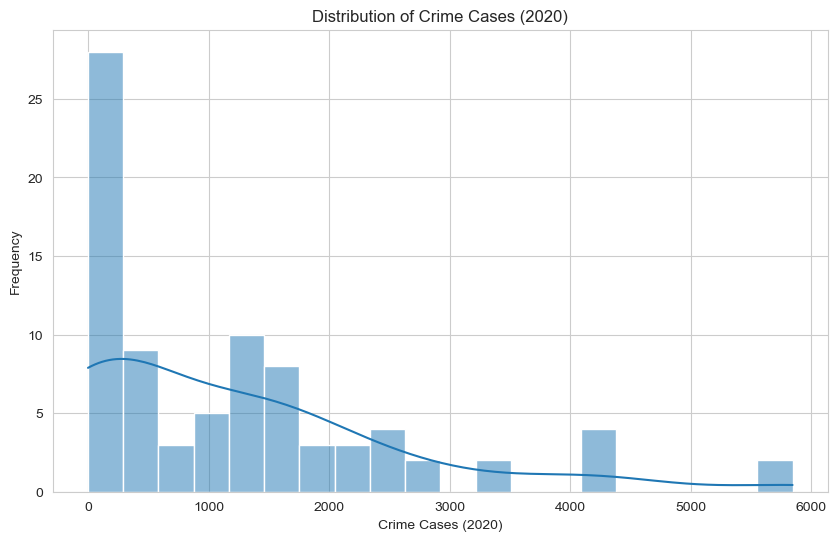

In [10]:
# Set plot style
sns.set_style("whitegrid")

# 1. Distribution of 'crime_cases_2020'
plt.figure(figsize=(10, 6))
sns.histplot(df['crime_cases_2020'], bins=20, kde=True)
plt.title('Distribution of Crime Cases (2020)')
plt.xlabel('Crime Cases (2020)')
plt.ylabel('Frequency')
plt.show()

This histogram shows that the majority of counties have a relatively low number of reported crime cases in 2020. The distribution is heavily skewed to the right, indicating that most counties experience fewer crime incidents. There are a few outlier counties with a significantly higher number of reported cases, suggesting that crime is not uniformly distributed but rather concentrated in certain areas.

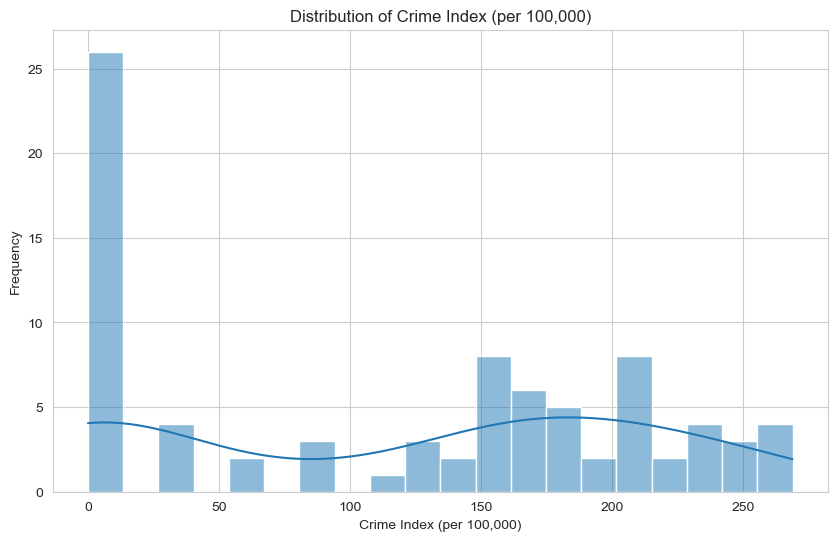

In [11]:
# 2. Distribution of 'crime_index_per_100,000'
plt.figure(figsize=(10, 6))
sns.histplot(df['crime_index_per_100,000'], bins=20, kde=True)
plt.title('Distribution of Crime Index (per 100,000)')
plt.xlabel('Crime Index (per 100,000)')
plt.ylabel('Frequency')
plt.show()

Similar to the crime cases distribution, this histogram reveals a skewed distribution for the crime index. Most counties have a lower crime index (fewer crimes per 100,000 people), while a smaller number of counties exhibit a much higher crime index. This indicates that even when accounting for population size, some regions have a disproportionately higher crime rate.

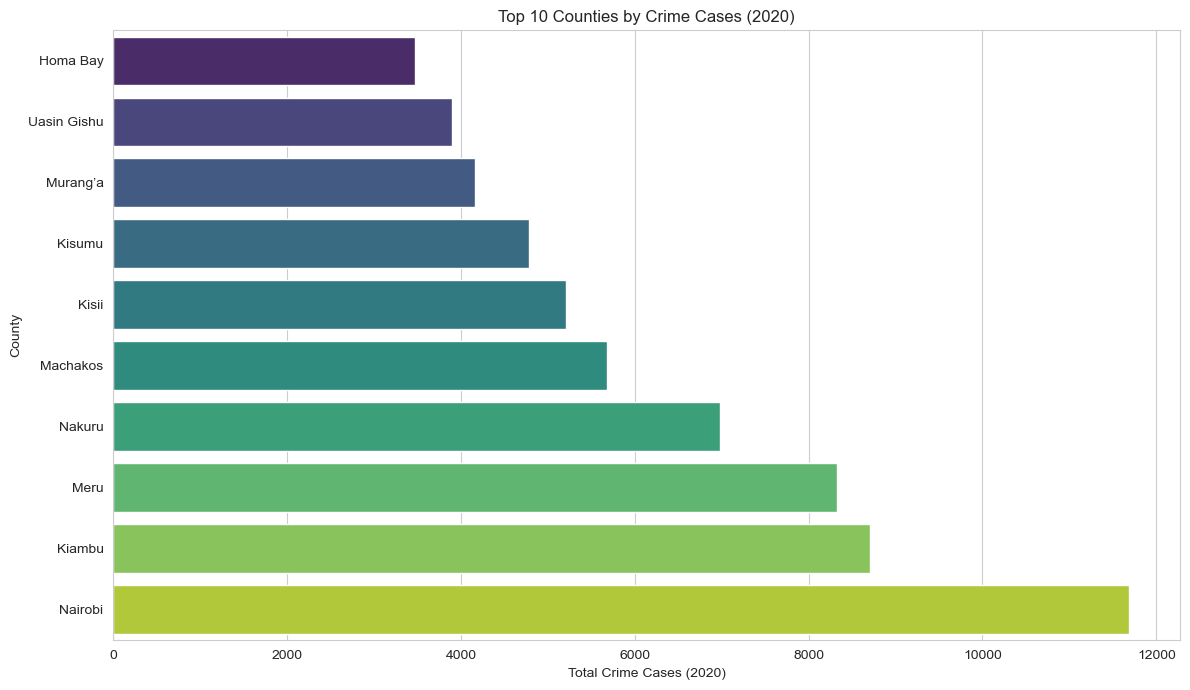

In [12]:
# 3. Top 10 Counties by Crime Cases (2020)
plt.figure(figsize=(12, 7))
top_crime_cases_counties = df.groupby('county')['crime_cases_2020'].sum().nlargest(10).sort_values(ascending=True)
sns.barplot(x=top_crime_cases_counties.values, y=top_crime_cases_counties.index, palette='viridis')
plt.title('Top 10 Counties by Crime Cases (2020)')
plt.xlabel('Total Crime Cases (2020)')
plt.ylabel('County')
plt.tight_layout()
plt.show()

This bar chart clearly identifies the counties with the highest absolute number of reported crime cases in 2020. These are the areas that faced the largest volume of crime incidents. Understanding these high-volume counties is crucial for allocating immediate resources and focusing law enforcement efforts where the sheer number of incidents is highest. The exact counties would be visible on the chart's y-axis, ordered from least to most among the top 10.

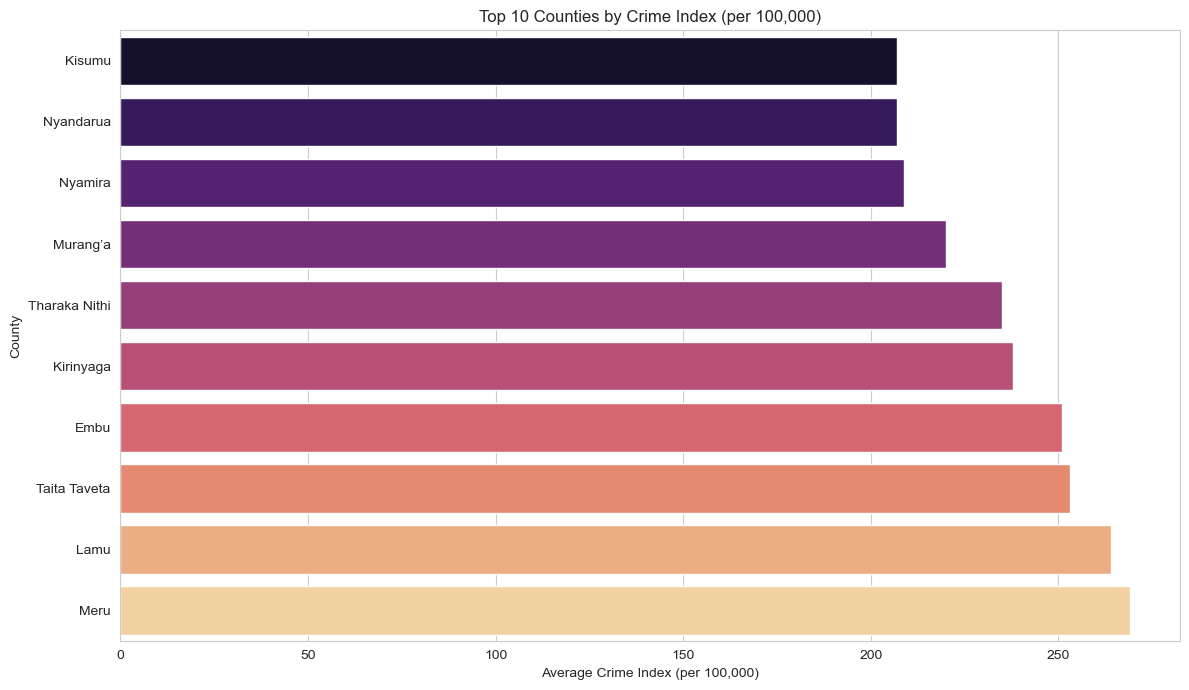

In [13]:
# 4. Top 10 Counties by Crime Index (per 100,000)
plt.figure(figsize=(12, 7))
top_crime_index_counties = df.groupby('county')['crime_index_per_100,000'].mean().nlargest(10).sort_values(ascending=True)
sns.barplot(x=top_crime_index_counties.values, y=top_crime_index_counties.index, palette='magma')
plt.title('Top 10 Counties by Crime Index (per 100,000)')
plt.xlabel('Average Crime Index (per 100,000)')
plt.ylabel('County')
plt.tight_layout()
plt.show()

This bar chart highlights counties that have the highest crime rates relative to their population. Unlike the previous chart that focused on raw numbers, the crime index normalizes by population, providing a more accurate measure of risk or prevalence. Counties appearing high on this list might not necessarily have the highest total number of crimes, but their residents are statistically more likely to be victims of crime. This helps pinpoint areas where crime is a significant issue per capita, even if the population is smaller.

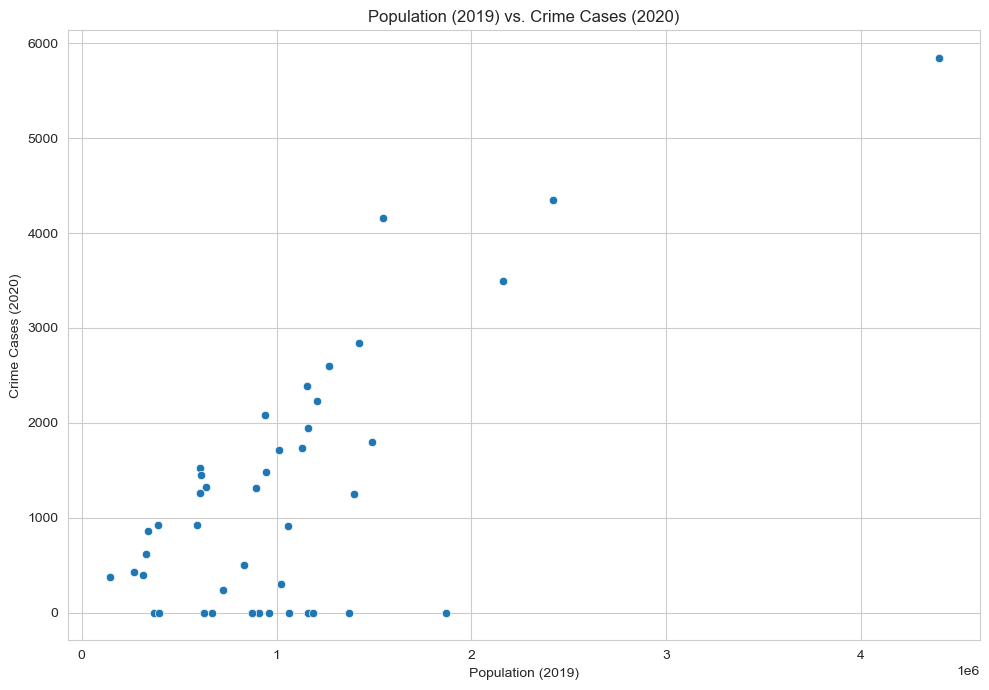

In [14]:
# 5. Relationship between Population and Crime Cases
plt.figure(figsize=(10, 7))
sns.scatterplot(x='population_2019', y='crime_cases_2020', data=df)
plt.title('Population (2019) vs. Crime Cases (2020)')
plt.xlabel('Population (2019)')
plt.ylabel('Crime Cases (2020)')
plt.tight_layout()
plt.show()

This scatter plot illustrates the relationship between a county's population and its reported crime cases. Generally, there appears to be a positive correlation: as the population of a county increases, the number of crime cases tends to increase as well. This is a common pattern, as more people often lead to more opportunities for crime or simply more incidents being reported. However, the scatter of points also suggests that while population is a strong factor, it's not the sole determinant, as counties with similar populations can have varying crime case numbers, and vice-versa.

 ## Poisson Regression Model Results

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the formula for Poisson Regression
# Dependent variable: crime_cases_2020 (count data)
# Independent variable: population_2019
formula = 'crime_cases_2020 ~ population_2019'

# Fit the Poisson Regression model
poisson_model = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()

print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       crime_cases_2020   No. Observations:                   83
Model:                            GLM   Df Residuals:                       81
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43871.
Date:                Fri, 18 Jul 2025   Deviance:                       87227.
Time:                        19:22:31   Pearson chi2:                 6.80e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.3434      0.005   12

The Poisson Regression model confirms a strong and statistically significant positive relationship between a county's population and the number of reported crime cases. As the population of a county increases, the number of crime cases is expected to increase. This finding aligns with common understanding that more populous areas generally experience higher crime volumes.

This model could be used to estimate or predict the number of crime cases in other counties based on their population, assuming similar conditions apply.

### 'Actual vs. Predicted Crime Cases

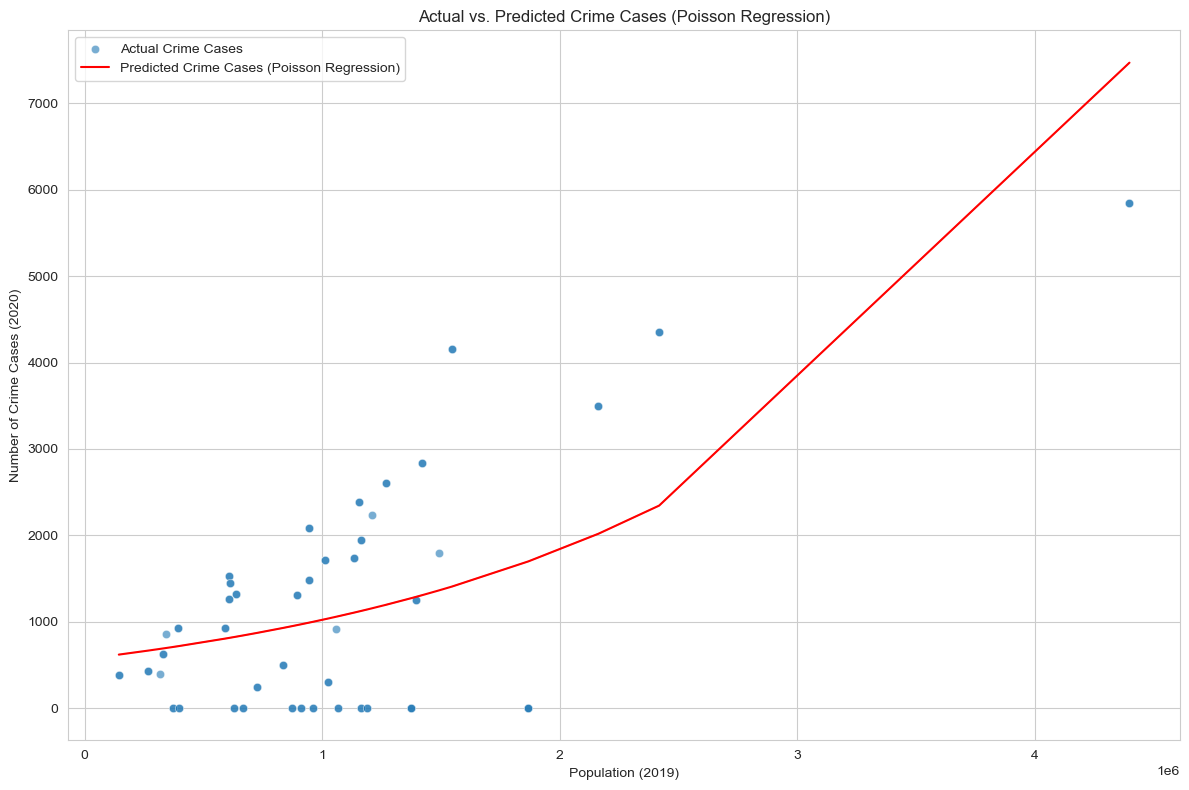

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the predicted values from the Poisson model

df['predicted_crime_cases'] = poisson_model.predict(df['population_2019'])

# Sort the DataFrame by population for a smoother prediction line
df_sorted = df.sort_values(by='population_2019')

# Plotting actual vs. predicted crime cases
plt.figure(figsize=(12, 8))
sns.scatterplot(x='population_2019', y='crime_cases_2020', data=df, label='Actual Crime Cases', alpha=0.6)
sns.lineplot(x='population_2019', y='predicted_crime_cases', data=df_sorted, color='red', label='Predicted Crime Cases (Poisson Regression)')

plt.title('Actual vs. Predicted Crime Cases (Poisson Regression)')
plt.xlabel('Population (2019)')
plt.ylabel('Number of Crime Cases (2020)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

'Actual vs. Predicted Crime Cases (Poisson Regression)' visualizes the relationship between population and crime cases:

The blue scatter points represent the actual number of crime cases (2020) for each county against their respective population (2019).

The red line represents the predicted number of crime cases generated by the Poisson Regression model, based on the population.

As you can see, the red line generally follows the trend of the actual data points, indicating that the model captures the positive relationship where higher populations are associated with a higher number of crime cases.